In [1]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import plotly.express as px
import numpy as np

Date Calculation 

In [2]:
#used Rajib's starter  code 

end_date = datetime.today().strftime('%Y-%m-%d')
end_date_split = end_date.split("-")
end_date_year = end_date_split[0]
end_date_month = end_date_split[1]
end_date_day = end_date_split[2]
beg_date_year = int(end_date_year) -5 
beg_date = str(beg_date_year) + "-" + end_date_month + "-" + end_date_day


In [3]:
#AAL = American Airlines
#JBLU = JetBlue
#UNP = Union Pacific
#JBHT = J.B. Hunt Transport Services
#MOTO = transport tech services: ETF

transport_stock_df = pd.DataFrame()
transport_stock_df["Stock Name"] = ''
transport_stock_df["Date"] = ''
transport_stock_df["Open"] = ''
transport_stock_df["High"] = ''
transport_stock_df["Low"] = ''
transport_stock_df["Close"] = ''
transport_stock_df["Adj Close"] = ''
transport_stock_df["Volume"] = ''


stocks = ["AAL", "JBLU", "UNP", "JBHT"]
for stock in stocks : 
    data = yf.download(stock, start = beg_date,
                   end = end_date)
    data["Stock Name"] = stock
    data = data.reset_index()
    transport_stock_df = transport_stock_df.append(data, ignore_index = True)

transport_stock_df.head()

[*********************100%***********************]  1 of 1 completed


C:\Users\Theresa\AppData\Local\Temp\ipykernel_11468\545628271.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transport_stock_df = transport_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\Theresa\AppData\Local\Temp\ipykernel_11468\545628271.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transport_stock_df = transport_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\Theresa\AppData\Local\Temp\ipykernel_11468\545628271.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transport_stock_df = transport_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\Theresa\AppData\Local\Temp\ipykernel_11468\545628271.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transport_stock_df = transport_stock_df.append(data, ignore_index = True)


,Stock Name,Date,Open,High,Low,Close,Adj Close,Volume
0,AAL,2018-08-14,36.840000,37.560001,36.830002,37.090000,36.399334,3873000
1,AAL,2018-08-15,36.959999,37.509998,36.419998,37.439999,36.742813,5599200
2,AAL,2018-08-16,37.750000,38.459999,37.439999,38.160000,37.449409,5876500
3,AAL,2018-08-17,37.990002,38.209999,37.720001,37.790001,37.086296,6364900
4,AAL,2018-08-20,38.040001,40.099998,37.990002,39.990002,39.245331,9628900


Transport Data Analysis

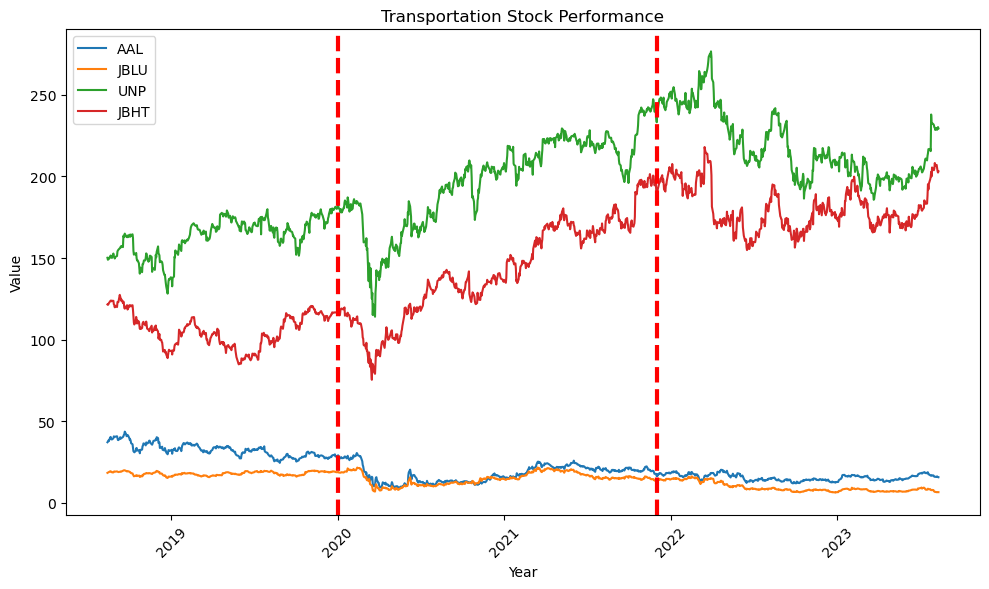

In [4]:
import datetime

# Generate a line plot of stock prices vs date
plot_AAL = transport_stock_df.loc[transport_stock_df["Stock Name"] == "AAL"]
plot_JBLU = transport_stock_df.loc[transport_stock_df["Stock Name"] == "JBLU"]
plot_UNP = transport_stock_df.loc[transport_stock_df["Stock Name"] == "UNP"]
plot_JBHT = transport_stock_df.loc[transport_stock_df["Stock Name"] == "JBHT"]

plt.figure(figsize = (10,6))
plt.plot(plot_AAL["Date"], plot_AAL["Close"], label="AAL")
plt.plot(plot_JBLU["Date"], plot_JBLU["Close"], label="JBLU")
plt.plot(plot_UNP["Date"], plot_UNP["Close"], label="UNP")
plt.plot(plot_JBHT["Date"], plot_JBHT["Close"], label="JBHT")

#Format line plot and label axis 

plt.axvline(datetime.datetime(2020, 1, 1), color='red', linewidth=3, linestyle='--')
plt.axvline(datetime.datetime(2021, 12, 1), color='red', linewidth=3, linestyle='--')
plt.title("Transportation Stock Performance")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()

# Show the chart
plt.show()

There is a sharp decline in value for both airline stocks in 2020 most likely due to the Covid 19 pandemic. Governments began to restrict travel with lockdowns due to uncertainty of the virus and how it spreads. Economic hardships negatively impacted passengers reducing the amount of money spent for transportation. Supply chain distruptions affected the availabilty of goods needed by the travel industries weakening investor confidence and causing stock prices to decline. After 2021 there is some improvement in stock prices but both stock values are still recovering. 

In [5]:
#Date intervals 

transport_selected_dates = [
    datetime.datetime(2020, 1, 1),
    datetime.datetime(2020, 3, 1),
    datetime.datetime(2020, 6, 1),
    datetime.datetime(2020, 12, 1),
    datetime.datetime(2021, 12, 1),
    datetime.datetime(2023, 8, 1)]

transport_selected_dates = transport_stock_df.loc[transport_stock_df["Date"].isin(transport_selected_dates)]

transport_selected_dates = transport_selected_dates[["Stock Name","Date","Open","Close"]].reset_index(drop=True) 

transport_selected_dates["Percent Change"] = transport_selected_dates.groupby("Stock Name").Close.pct_change()
transport_selected_dates

,Stock Name,Date,Open,Close,Percent Change
0,AAL,2020-06-01,10.790000,11.110000,NaN
1,AAL,2020-12-01,14.420000,14.270000,0.284429
2,AAL,2021-12-01,17.940001,16.280001,0.140855
3,AAL,2023-08-01,16.540001,16.230000,-0.003071
4,JBLU,2020-06-01,10.140000,10.200000,NaN
5,JBLU,2020-12-01,15.460000,15.420000,0.511765
6,JBLU,2021-12-01,13.800000,12.860000,-0.166018
7,JBLU,2023-08-01,7.230000,7.130000,-0.445568
8,UNP,2020-06-01,169.360001,169.500000,NaN
9,UNP,2020-12-01,205.699997,202.399994,0.194100
